In [274]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [275]:
def get_data():
    return pd.read_table('jain.txt', names = ['x1', 'x2', 'y'])

In [276]:
get_data().head()

,x1,x2,y
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2


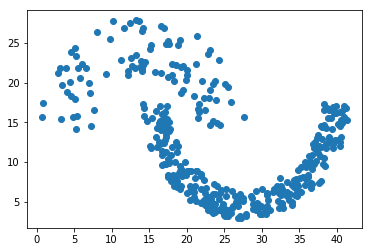

In [277]:
data = get_data()
plt.plot(data.x1, data.x2, 'o')
plt.show()

### K-means

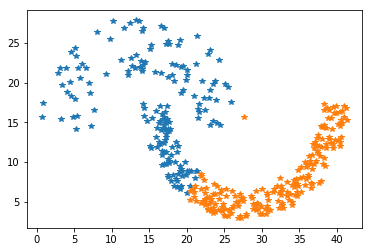

In [278]:
data = get_data()
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
kmeans_labels = kmeans.labels_

data['kmeans'] = kmeans_labels

sub_kmeans_1 = data[data.kmeans ==1] 
sub_kmeans_2 = data[data.kmeans ==0] 

plt.plot(sub_kmeans_1.x1, sub_kmeans_1.x2, '*')
plt.plot(sub_kmeans_2.x1, sub_kmeans_2.x2, '*')
plt.show()

### Hierarchical clustering

In [279]:
data = get_data()
agglomerative = AgglomerativeClustering(2)
agglomerative.fit(data)
agglomerative_lables = agglomerative.labels_

In [280]:
data['agglomerative'] = agglomerative_lables

sub_agg_1 = data[data.agglomerative ==1] 
sub_agg_2 = data[data.agglomerative ==0] 

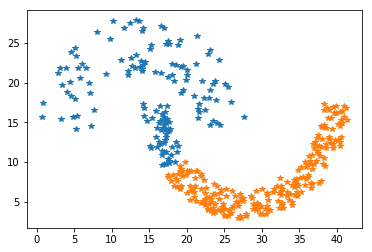

In [281]:
plt.plot(sub_agg_1.x1, sub_agg_1.x2, '*')
plt.plot(sub_agg_2.x1, sub_agg_2.x2, '*')
plt.show()

### DBSCAN

[ 1.9   1.91  1.92  1.93  1.94  1.95  1.96  1.97  1.98  1.99  2.  ]


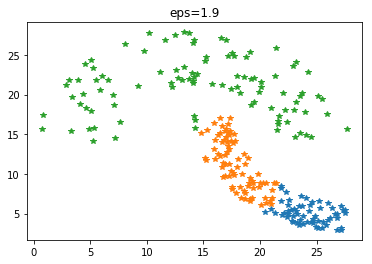

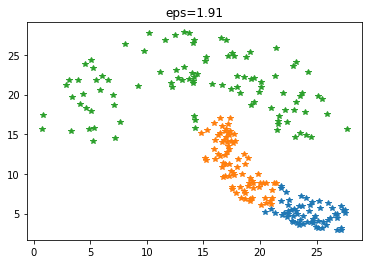

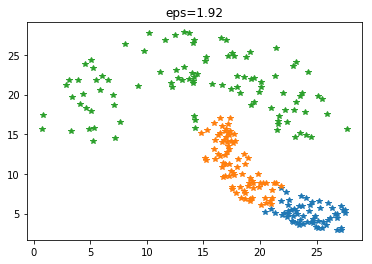

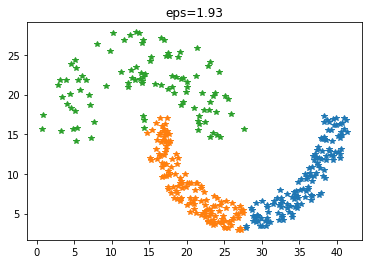

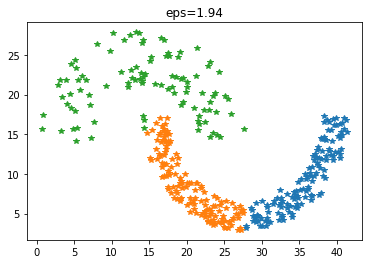

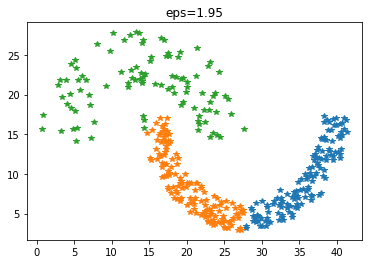

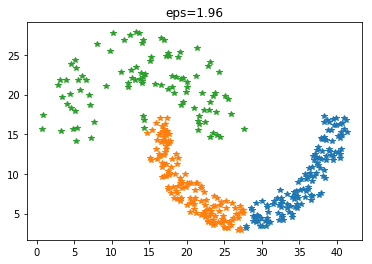

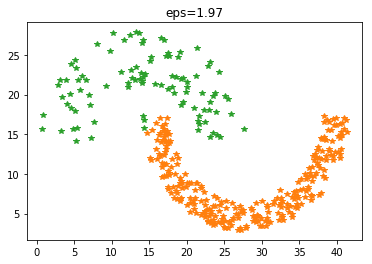

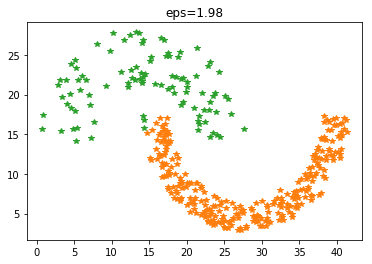

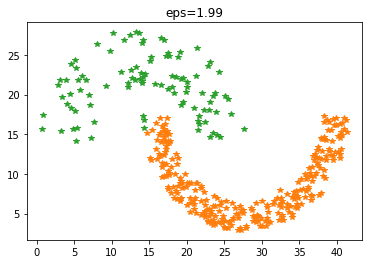

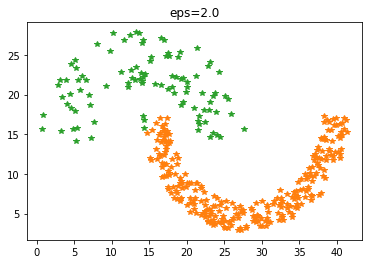

In [302]:
import numpy as np
eps_list = np.linspace(1.9, 2.0, 11)
print(eps_list)
for eps in eps_list:
    data = get_data()
    db = DBSCAN(eps=eps, min_samples=20).fit(data)
    db_labels = db.labels_

    data['dbscan'] = db_labels

    sub_db_1 = data[data.dbscan ==1] 
    sub_db_2 = data[data.dbscan ==0] 
    sub_db_3 = data[data.dbscan ==-1] 

    plt.figure()
    plt.title('eps={eps}'.format(eps=eps))
    plt.plot(sub_db_1.x1, sub_db_1.x2, '*')
    plt.plot(sub_db_2.x1, sub_db_2.x2, '*')
    plt.plot(sub_db_3.x1, sub_db_3.x2, '*')
    plt.show()